# Interpretive Tag Statistics for Katherine Mansfield's "The Garden Party"

First, let's get all the necessary programming libraries that will allow us to do these computations. 

In [183]:
from bs4 import BeautifulSoup  # For processing XMLfrom BeautifulSoup
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from math import floor
matplotlib.style.use('ggplot')
import numpy as np

Next, let's read the XML file of the short story.

In [184]:
doc = open('garden-party.xml').read()
soup = BeautifulSoup(doc, 'lxml')

Read all the critical remarks.

In [185]:
interps = soup.findAll('interp')

These functions will extract the tags from the critical remarks. 

In [186]:
def getTags(interp): 
    descs = interp.findAll('desc')
    descList = []
    for desc in descs: 
        descList.append(desc.string)
    return descList

def getAllTags(interps):
    allTags = []
    for interp in interps: 
        tags = getTags(interp)
        for tag in tags: 
            allTags.append(tag)
    return allTags

Create a de-duplicated list of tags represented. 

In [187]:
def dedupe(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]
allTags = dedupe(getAllTags(interps))
print(str(allTags))
len(allTags)

['perfection', 'interruptions', 'medias-res', 'class', 'wind', 'colors', 'blue', 'light', 'silver-gold', 'flora', 'green', 'hats', 'impressions', 'coming-of-age', 'carnival', 'inversions', 'orientalism', 'butterflies', 'food', 'desire', 'voices', 'sexuality', 'eyes', 'reminders', 'onomatopoeia', 'fingers', 'envelope', 'sound', 'happiness', 'touch', 'sounds', 'absurdity', 'play', 'voice', 'flora ', 'servants', 'death', 'mourning', 'music', 'dreams', 'ambiguity', 'animals', 'dividers', 'birds', 'conflicting-emotion', 'black', 'time', 'party', 'conflicting-emotions', 'darkness', 'oil']


51

Create a table of all the tags, and where they occur according to lexia.

In [188]:
tagDict = {}
for interp in interps: 
    number = int(interp.attrs['n'])
    tags = getTags(interp)
    tagDict[number] = tags

Create a function for checking whether a tag is associated with a certain lexia.

In [189]:
def checkTags(tag):
    hasTags = []
    for n in tagDict: 
        if tag in tagDict[n]: 
            hasTags.append(1)
        else: 
            hasTags.append(0)
    return hasTags

Assemble a matrix of all tags, and whether they occur in certain lexia. Turn this into a data frame.

In [190]:
hasTagMatrix = {}
for tag in allTags: 
    hasTagMatrix[tag] = checkTags(tag)
df = pd.DataFrame(hasTagMatrix)

In [191]:
df.head()

,absurdity,ambiguity,animals,birds,black,blue,butterflies,carnival,class,colors,...,servants,sexuality,silver-gold,sound,sounds,time,touch,voice,voices,wind
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


While we're at it, let's find the most frequent tags.

In [192]:
s = df.sum(axis='rows').sort_values(ascending=False)
mostFrequentTags = s[s>3]

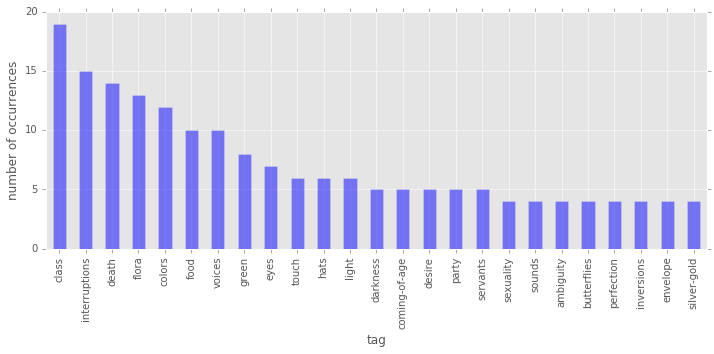

In [193]:
mft = mostFrequentTags.plot(kind='bar', alpha=0.5, figsize=(10,5))
mft.set_xlabel('tag')
mft.set_ylabel('number of occurrences')
fig = mft.get_figure()
fig.tight_layout()
fig.savefig('images/mtf.png') # save it to a file

Group lexia by 10s, so the data are more meaningful than ones and zeroes.

In [194]:
chunkSize=5
def chunkdf(df, chunkSize): 
    groups = df.groupby(lambda x: floor(x/chunkSize)).sum()
    return groups
groups = chunkdf(df, chunkSize)

Let's examine some of the tags. Where do references to flora occur in the story (as tagged)? Do these co-occur with references to sexuality?

In [195]:
party = [145, 150] # These are the lexia where the party occurs. Let's draw dotted lines there.
partyAdjusted = [x/chunkSize for x in party]
def plotTags(tags, thisdf=groups): 
    plot = thisdf[tags].plot(kind='area', alpha=0.5, figsize=(10,5))
    ymax = plot.get_ylim()[1]
    plot.axvspan(partyAdjusted[0], partyAdjusted[1], facecolor="0.65", alpha=0.5)
    plot.text(partyAdjusted[0]+0.2,ymax/2,'party',rotation=90)
    plot.set_xlabel('lexia number / ' + str(chunkSize))
    plot.set_ylabel('number of occurrences')
    fig = plot.get_figure()
    fig.tight_layout()
    fig.savefig('images/' + '-'.join(tags) + '.png') # save it to a file

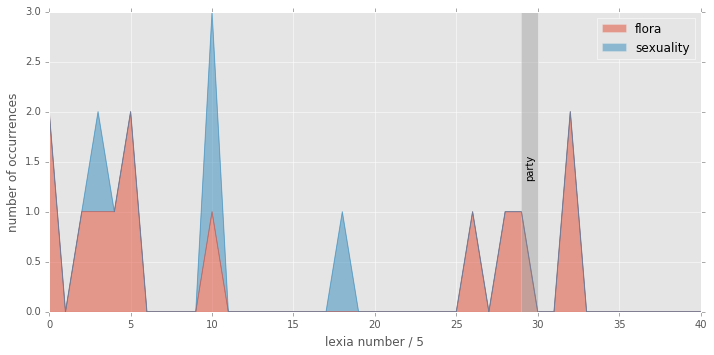

In [196]:
fig = plotTags(['flora', 'sexuality'])

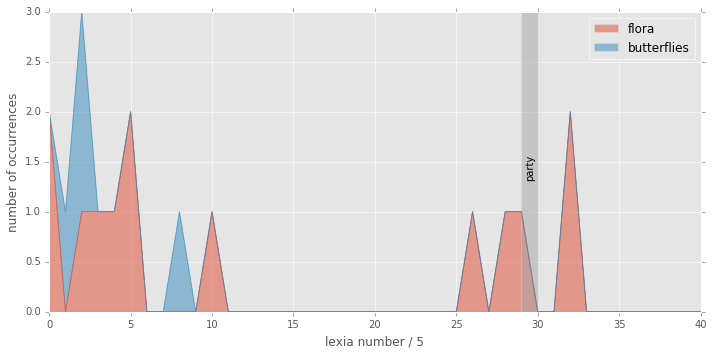

In [197]:
plotTags(['flora', 'butterflies'])

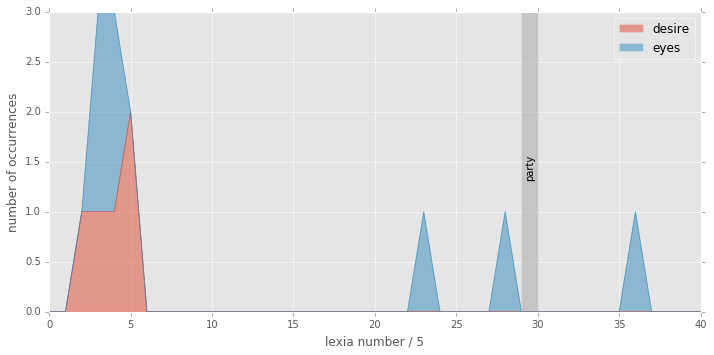

In [198]:
plotTags(['desire', 'eyes'])

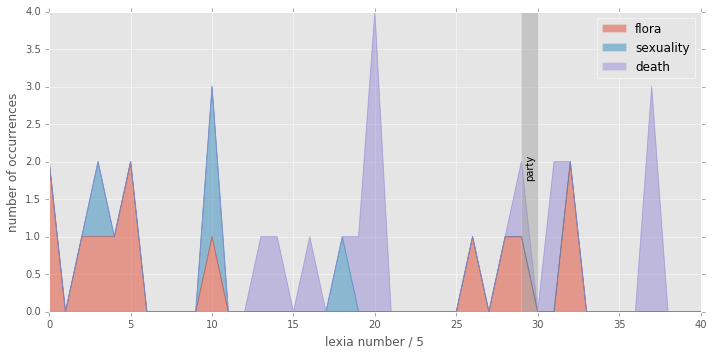

In [199]:
plotTags(['flora', 'sexuality', 'death'])

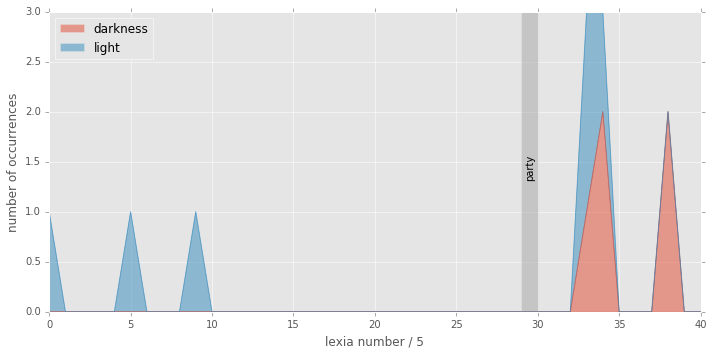

In [200]:
plotTags(['darkness', 'light'])

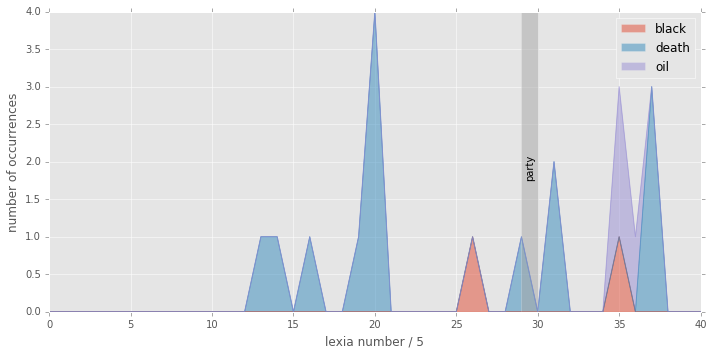

In [201]:
plotTags(['black', 'death', 'oil'])

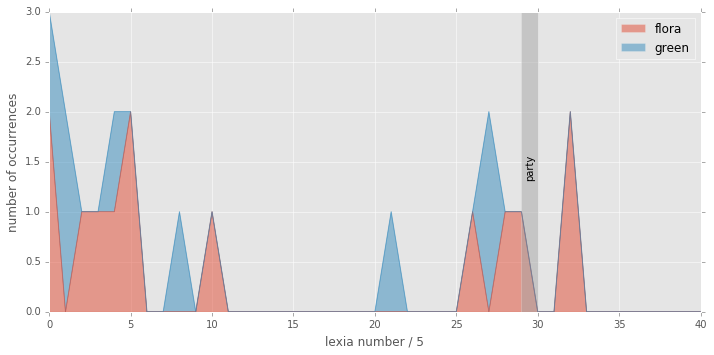

In [202]:
plotTags(['flora', 'green'])

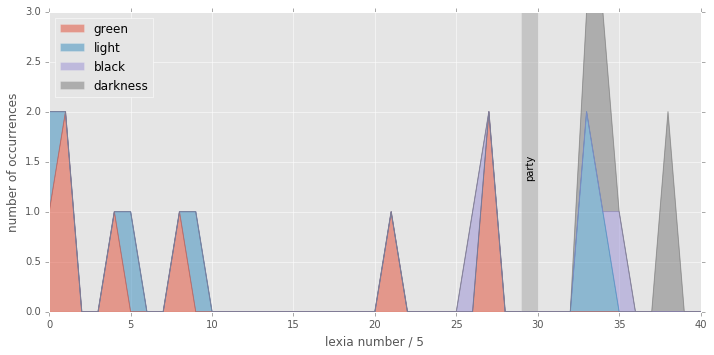

In [203]:
plotTags(['green', 'light', 'black', 'darkness'])

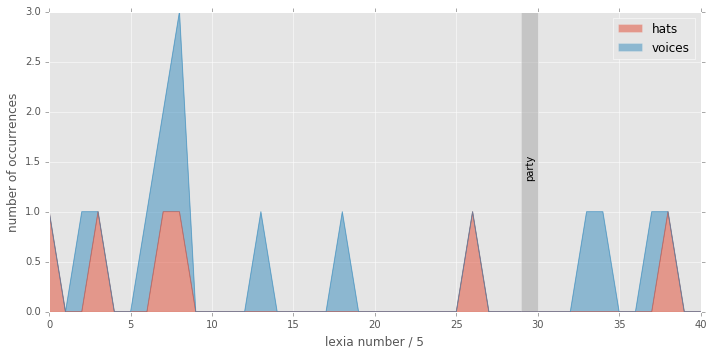

In [204]:
plotTags(['hats', 'voices'])

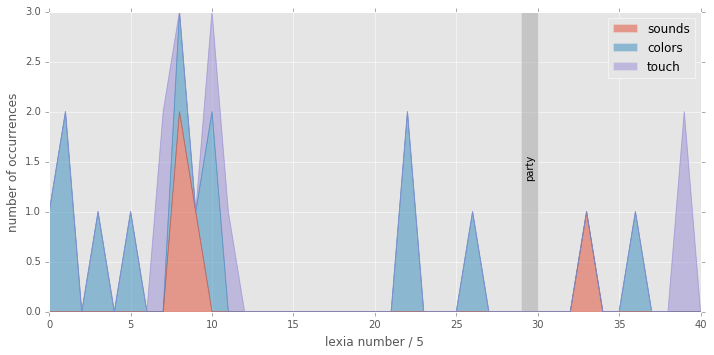

In [205]:
plotTags(['sounds', 'colors', 'touch'])

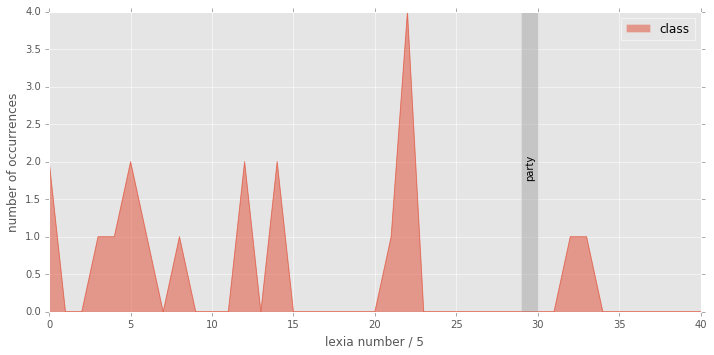

In [206]:
plotTags(['class'])